# Student Performance Indicator

### Life Cycle Of Machine Learning Project

##### 1. Understand the problem statement
##### 2. Data Collection
##### 3. Data Checks to perform
##### 4. Exploratory Data Analysis
##### 5. Model Training
##### 6. Choose best model

## 1) Problem Statement

##### This problem undestands how the students performance (test scores) is affected by ther variables such as Gender, Ethnicity, Parental Level of Education, Lunch and Test Preparation

## 1.1) Import Data and required packages


##### Importing numpy,pandas,Matplotlib,Seaborn and Warnings Library

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV DATA as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

### Show top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
## Shape of the dataset

df.shape

(1000, 8)

### Datachecks to Performs

In [5]:
## Check missing values

df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
## Checking Duplicates

df.duplicated().sum()

0

In [7]:
## Checking unique values in each column

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
##Checking data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
## Checking statistics

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploratory Data

In [12]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [41]:
print("Categories in 'gender' variable are:   ", end = " ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable are:   ", end = " ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable are:   ", end = " ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable are:   ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable are:   ", end = " ")
print(df['test preparation course'].unique())

Categories in 'gender' variable are:    ['female' 'male']
Categories in 'race/ethnicity' variable are:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable are:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable are:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable are:    ['none' 'completed']


In [16]:
## Listing out numerical and categorical features

num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

## Printing columns

print('We have {} numerical features and they are : {}' .format(len(num_features),num_features))

print('We have {} categorical features and they are : {}' .format(len(cat_features),cat_features))

We have 3 numerical features and they are : ['math score', 'reading score', 'writing score']
We have 5 categorical features and they are : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Adding columns for total score and average

In [17]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [18]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

df['average'] = df['total score']/3

df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


In [19]:
## Students will full marks

reading_full = df[df['reading score']==100]['average'].count()

math_full = df[df['math score']==100]['average'].count()

writing_full = df[df['writing score']==100]['average'].count()

print(f'Number of students with full marks in Maths : {math_full}')

print(f'Number of students with full marks in reading : {reading_full}')

print(f'Number of students with full marks in writing : {writing_full}')

Number of students with full marks in Maths : 7
Number of students with full marks in reading : 17
Number of students with full marks in writing : 14


In [ ]:
## Students with less than 20 marks

In [21]:
reading_bottom = df[df['reading score'] <=20]['average'].count()

math_bottom = df[df['math score'] <=20]['average'].count()

writing_bottom = df[df['writing score'] <= 20]['average'].count()

print(f'Number of students with bottom marks in Maths : {math_bottom}')

print(f'Number of students with bottom marks in reading : {reading_bottom}')

print(f'Number of students with bottom marks in writing : {writing_bottom}')

Number of students with bottom marks in Maths : 4
Number of students with bottom marks in reading : 1
Number of students with bottom marks in writing : 3


##  Visualization


##### Histogram

##### Kernel Distribution Function (KDE)

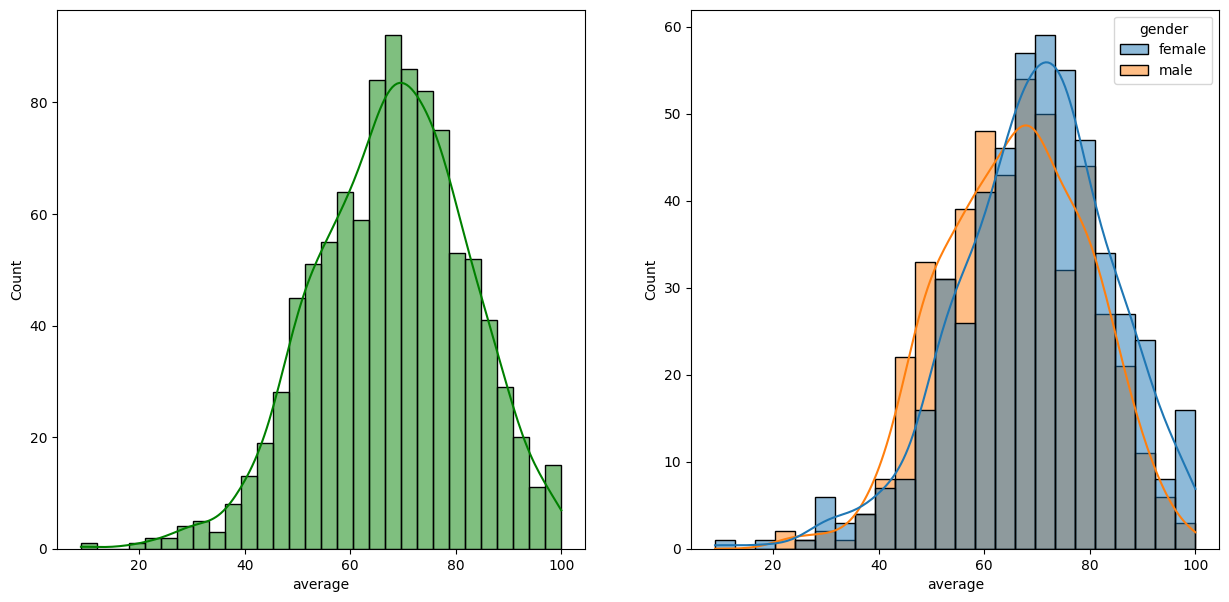

In [22]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

plt.show()

<Axes: xlabel='total score', ylabel='Count'>

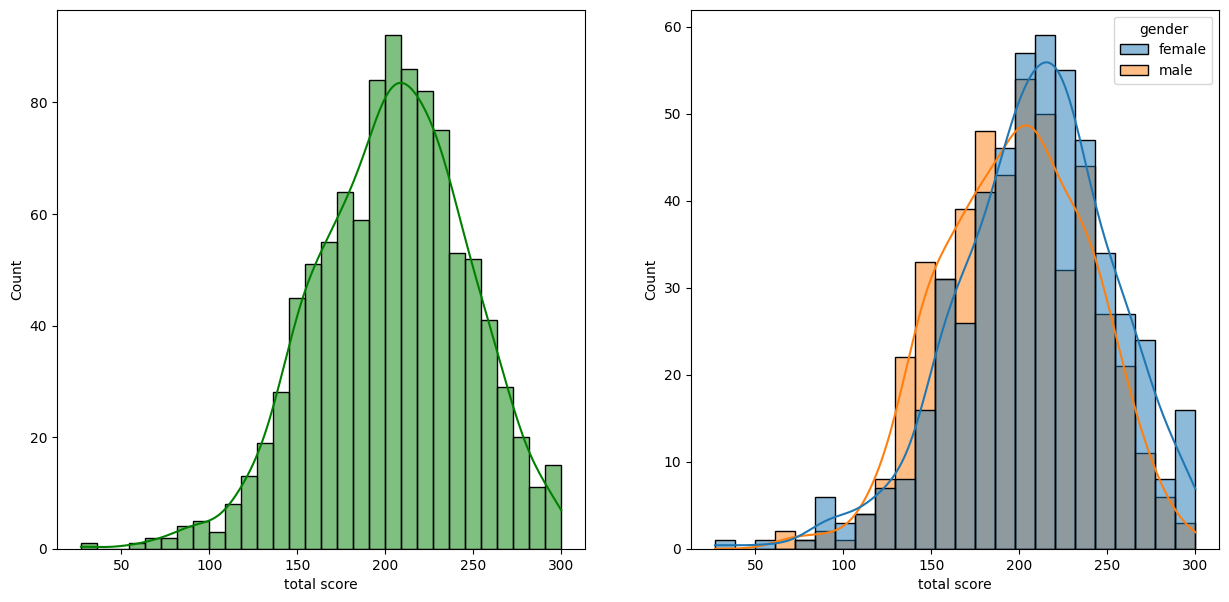

In [23]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')

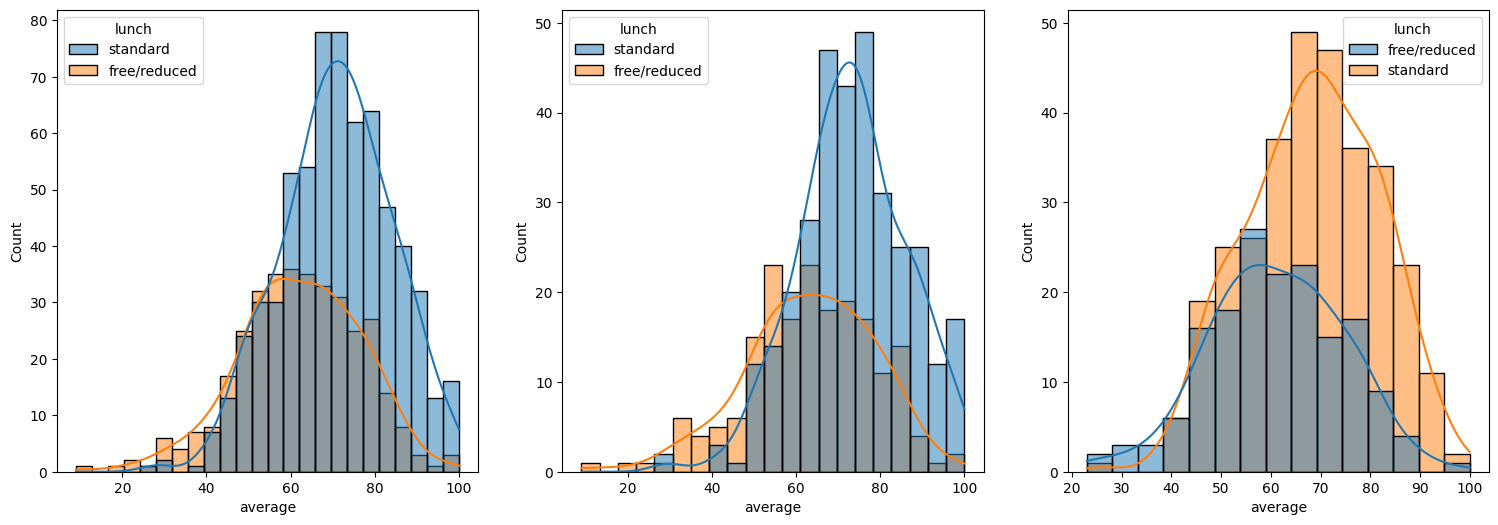

In [24]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='lunch')
plt.show()

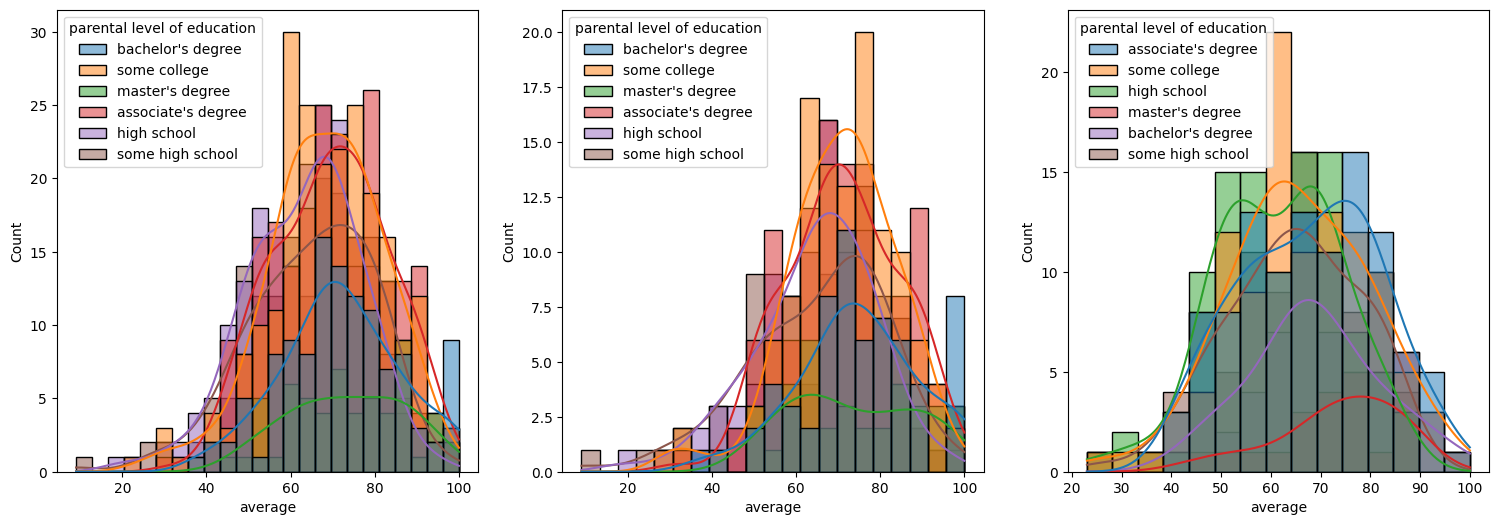

In [25]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='parental level of education')
plt.show()

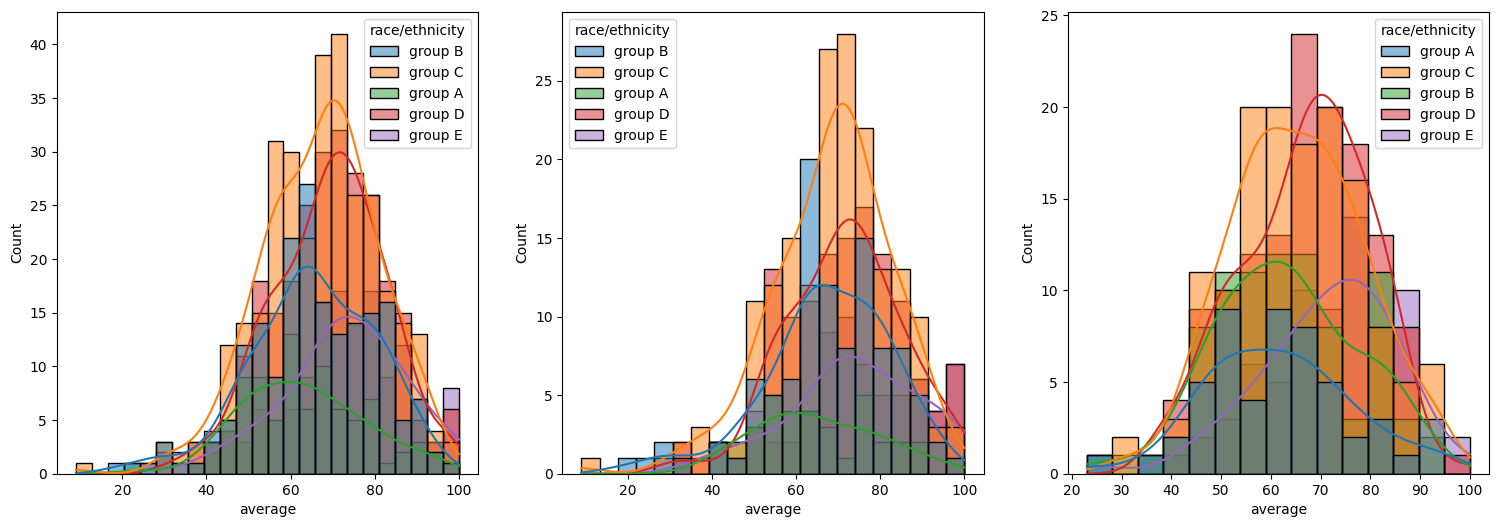

In [26]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

## Maximum score of students in all 3 subjects

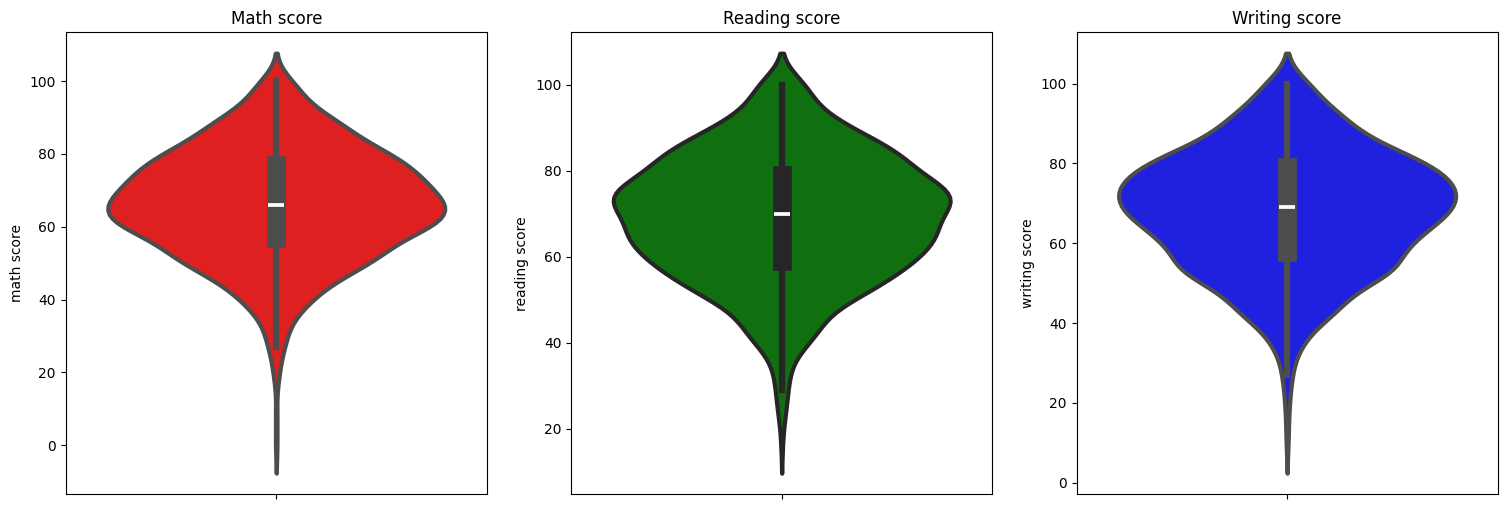

In [28]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
plt.title('Math score')
sns.violinplot(data=df,y='math score',color='red',linewidth=3)
plt.subplot(142)
plt.title('Reading score')
sns.violinplot(data=df,y='reading score',color='green',linewidth=3)
plt.subplot(143)
plt.title('Writing score')
sns.violinplot(data=df,y='writing score',color='blue',linewidth=3)
plt.show()

## Multivariate analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

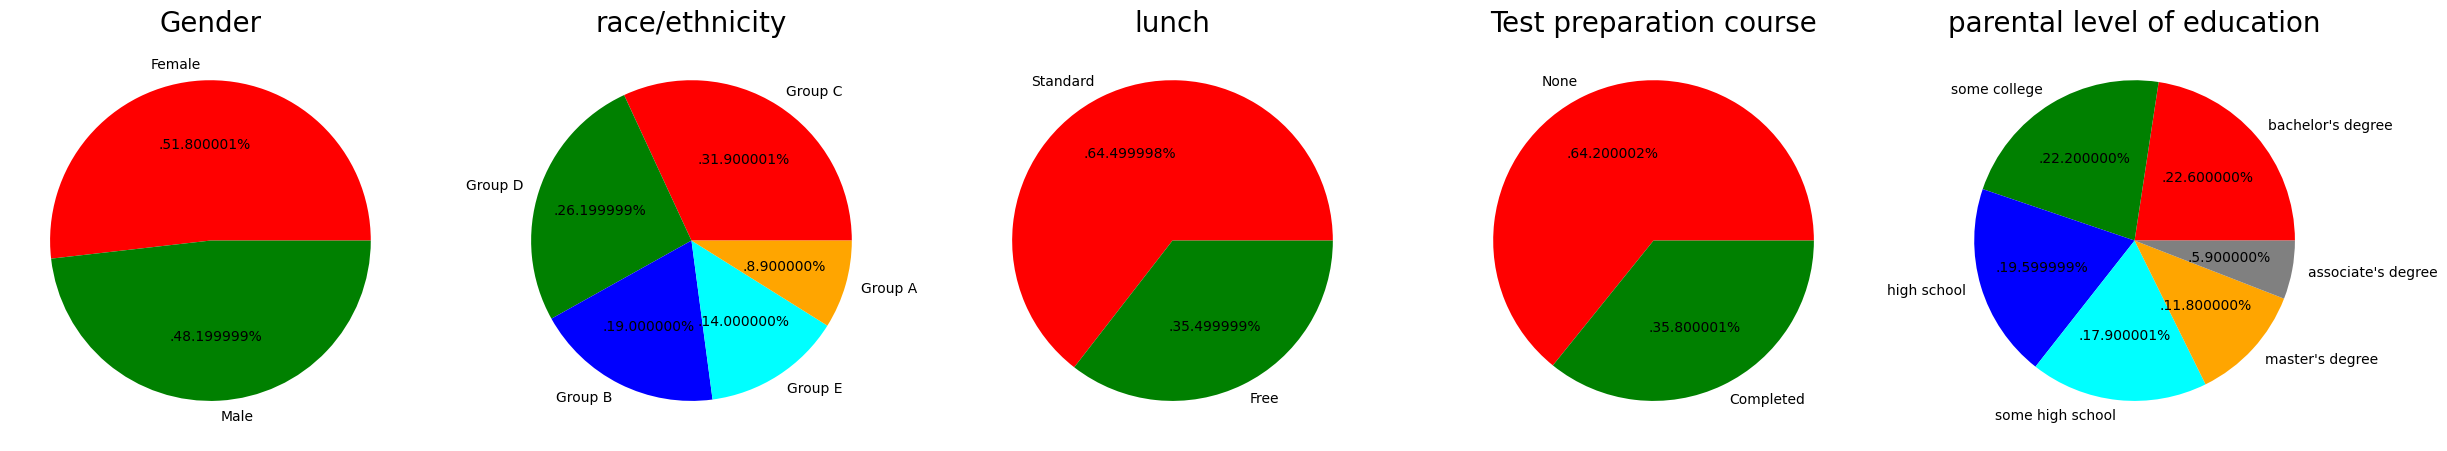

In [32]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')


plt.subplot(152)
size = df['race/ethnicity'].value_counts()
labels = 'Group C','Group D','Group B','Group E','Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('race/ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(153)
size = df['lunch'].value_counts()
labels = 'Standard','Free'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('lunch',fontsize=20)
plt.axis('off')


plt.subplot(154)
size = df['test preparation course'].value_counts()
labels = 'None','Completed'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Test preparation course',fontsize=20)
plt.axis('off')


plt.subplot(155)
size = df['parental level of education'].value_counts()
labels = "bachelor's degree",'some college','high school','some high school',"master's degree","associate's degree"
color = ['red','green','blue','cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('parental level of education',fontsize=20)
plt.axis('off')


## Univariate Analysis

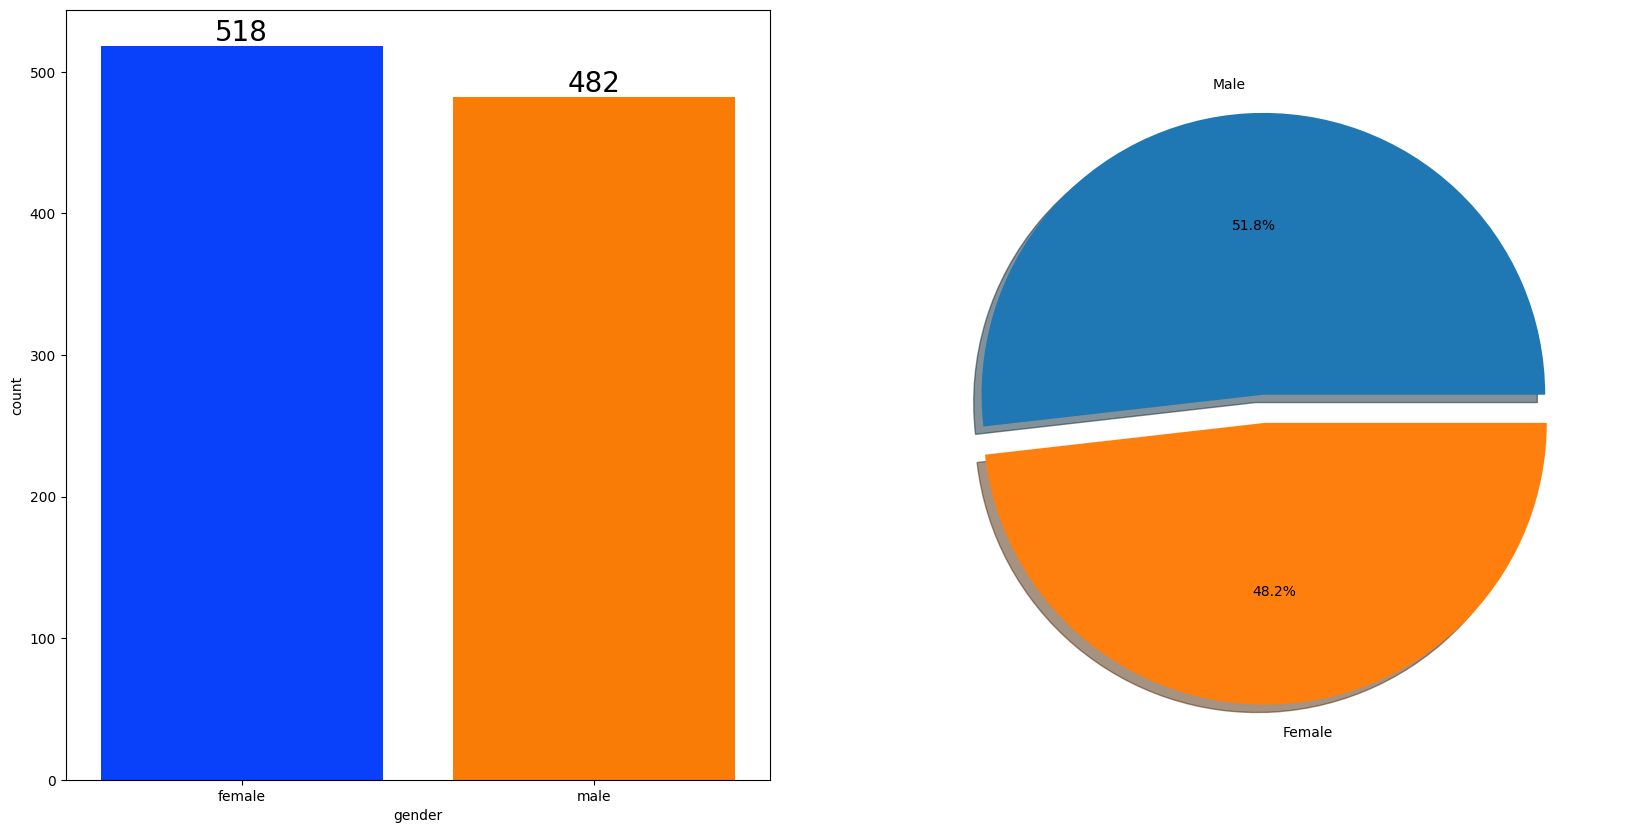

In [34]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

In [39]:
##Bivariate Analysis (Does gender have any impact on performance)

gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


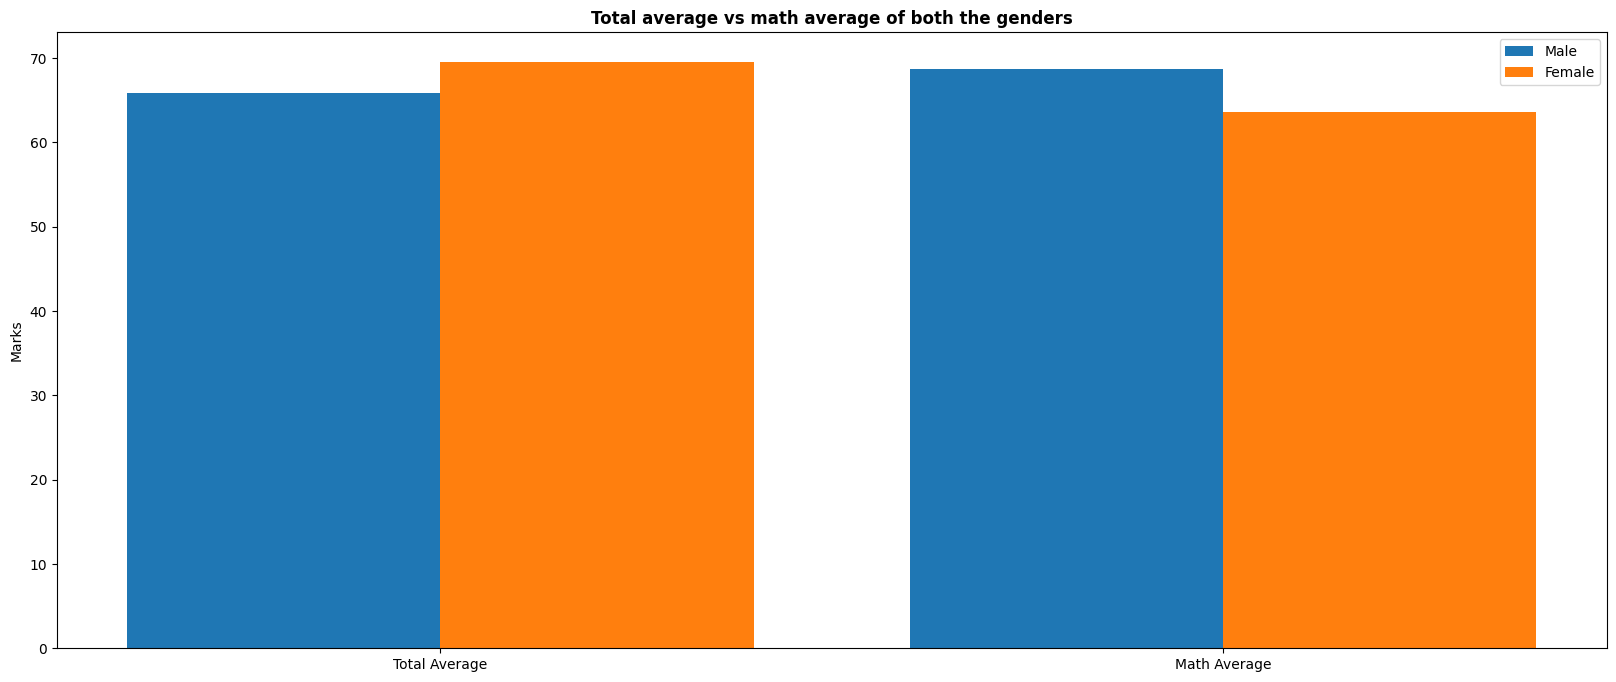

In [40]:
plt.figure(figsize=(20,8))

X = ['Total Average','Math Average']

female_score = [gender_group['average'][0],gender_group['math score'][0]]

male_score = [gender_group['average'][1],gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_score, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_score, 0.4, label = 'Female')

plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title("Total average vs math average of both the genders", fontweight = 'bold')
plt.legend()
plt.show()